In [1]:
import pandas as pd
import numpy as np
import pyhomogeneity as hg
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file
df = pd.read_csv("O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\DMI Long Data Series\\1876 Data\\DMIRep21-02\\dk_daily_pr_esbjerg_blended_1874_2025.csv", delimiter = ';')

In [4]:
df

,stat_no,year,month,day,hour,pr
0,25140,1874,1,1,8,1.3
1,25140,1874,1,2,8,1.0
2,25140,1874,1,3,8,2.3
3,25140,1874,1,4,8,6.8
4,25140,1874,1,5,8,3.7
...,...,...,...,...,...,...
55207,534020,2025,2,24,23,19.6
55208,534020,2025,2,25,23,1.0
55209,534020,2025,2,26,23,0.2
55210,534020,2025,2,27,23,0.8


In [5]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])

In [6]:
pr = df.pr.to_numpy()

In [7]:
pr

array([1.3, 1. , 2.3, ..., 0.2, 0.8, 0. ])

In [8]:
monthly_pr = df.resample('M', on = 'date')['pr'].sum()

C:\Users\mnew\AppData\Local\Temp\ipykernel_3484\2605137427.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pr = df.resample('M', on = 'date')['pr'].sum()


In [9]:
monthly_pr_df = monthly_pr.reset_index()
monthly_pr_df.columns = ['date', 'pr']

In [10]:
monthly_pr_df

,date,pr
0,1874-01-31,50.8
1,1874-02-28,13.9
2,1874-03-31,43.4
3,1874-04-30,38.1
4,1874-05-31,31.7
...,...,...
1809,2024-10-31,62.7
1810,2024-11-30,85.2
1811,2024-12-31,85.4
1812,2025-01-31,113.7


In [11]:
monthly_pr = monthly_pr_df.pr.to_numpy()

Text(0, 0.5, 'frequency')

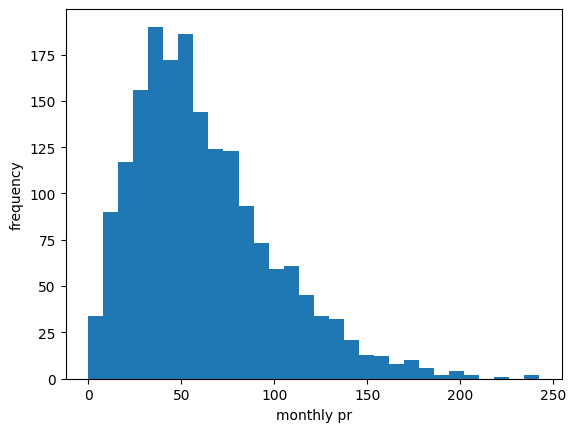

In [12]:
plt.hist(monthly_pr, bins = 30)
plt.xlabel('monthly pr')
plt.ylabel('frequency')

In [13]:
sqrt_monthly_pr = np.sqrt(monthly_pr)

Text(0, 0.5, 'frequency')

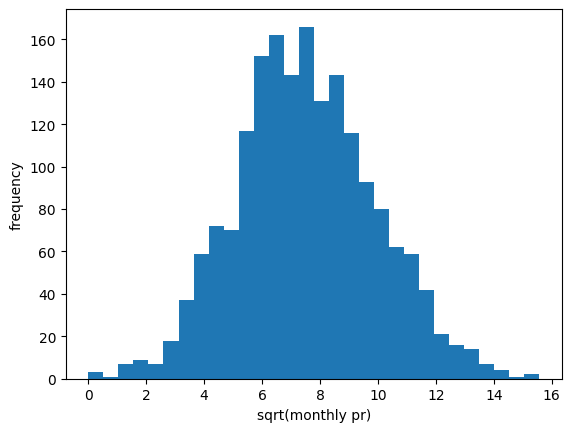

In [14]:
plt.hist(sqrt_monthly_pr, bins = 30)
plt.xlabel('sqrt(monthly pr)')
plt.ylabel('frequency')

In [15]:
result_pt = hg.pettitt_test(pr)

In [16]:
result_pt

Pettitt_Test(h=False, cp=55184, p=0.94675, U=4295280925.0, avg=mean(mu1=2.050554508553204, mu2=1.3285714285714287))

In [17]:
result_snht = hg.snht_test(sqrt_monthly_pr)

In [18]:
result_snht

SNHT_Test(h=True, cp=1794, p=0.0, T=34.47269848952148, avg=mean(mu1=7.488744523625207, mu2=10.667198776814116))

In [19]:
monthly_pr_df.iloc[1794]

date    2023-07-31 00:00:00
pr                    179.6
Name: 1794, dtype: object

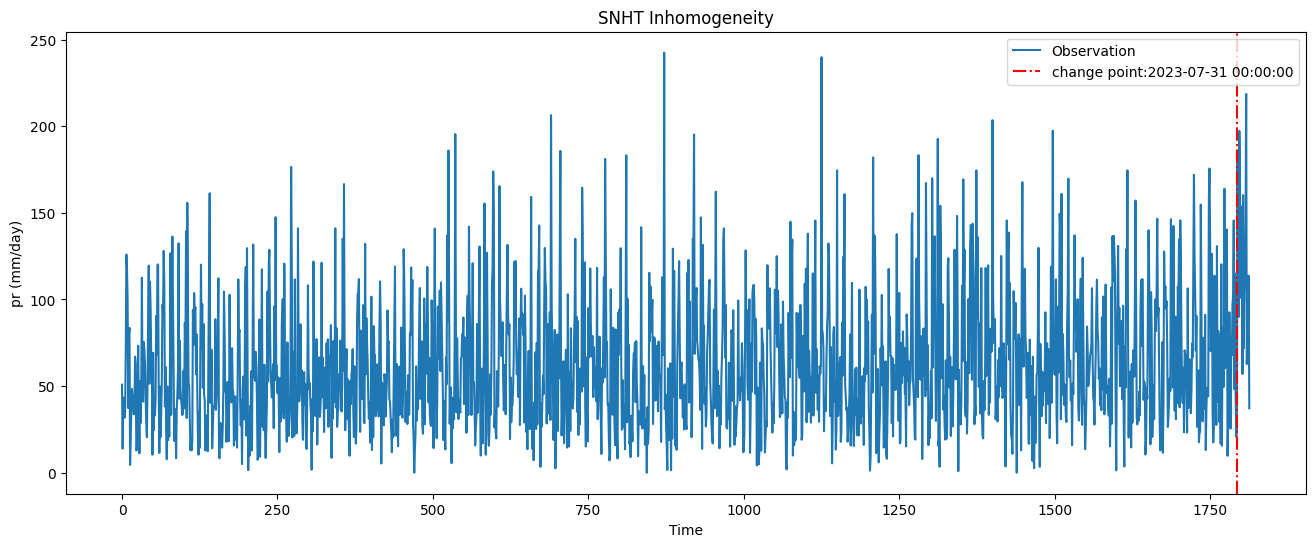

In [20]:
mn = 0
mx = len(monthly_pr)
loc = result_snht.cp
mu1 = result_snht.avg.mu1
mu2 = result_snht.avg.mu2
plt.figure(figsize=(16,6))
plt.plot(monthly_pr, label='Observation')
plt.axvline(x=loc, linestyle='-.' , color='red', lw=1.5,
label='change point:'+ str(monthly_pr_df.iloc[1794].date))
plt.title('SNHT Inhomogeneity')
plt.xlabel('Time')
plt.ylabel('pr (mm/day)')
plt.legend(loc='upper right')